#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')


In [2]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [4]:
# 1. discover all with info function that give us #rows , #columns , datatypes and #missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


- We Can discover each one of these with special function

In [5]:
# detrmine #rows , #columns with shpae function
df.shape

(148654, 13)

In [6]:
# detrmine datatypes with dtypes func
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [7]:
# detrmine missing values with isna or isnull func
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [8]:
# we can make that with describe func 
df[['TotalPayBenefits','TotalPay']].describe().round(3)

,TotalPayBenefits,TotalPay
count,148654.000,148654.000
mean,93692.555,74768.322
std,62793.533,50517.005
min,-618.130,-618.130
25%,44065.650,36168.995
50%,92404.090,71426.610
75%,132876.450,105839.135
max,567595.430,567595.430


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.


In [9]:
# we can look on missing data 
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [10]:
# in Notes , Status columns the whole column has missing values so we will drop them
df.drop(['Notes', 'Status'], axis=1, inplace=True)

In [11]:
# in BasePay , Benfits columns we can not drop all nissing values because this will make negative effect on the shape of data
# so we will replace the missing data with the mean(Average) of this column

# BasePay
# Calculate the average of 'BasePay' column
BasePay_avg = df['BasePay'].mean()
# Replace missing values in 'BasePay' column with the mean
df['BasePay'].fillna(BasePay_avg, inplace=True)

# Benfits
# Calculate the average of 'BasePay' column
Benfits_avg = df['Benefits'].mean()
# Replace missing values in 'BasePay' column with the mean
df['Benefits'].fillna(Benfits_avg, inplace=True)

In [12]:
# in OvertimePay , OtherPay columns number of missing values are not many, so i will drop them
df.dropna(subset=['OvertimePay'], inplace=True)
df.dropna(subset=['OtherPay'], inplace=True)

In [13]:
# check again 
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [14]:
# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Salaries Distrbuation'}, xlabel='TotalPay', ylabel='Count'>

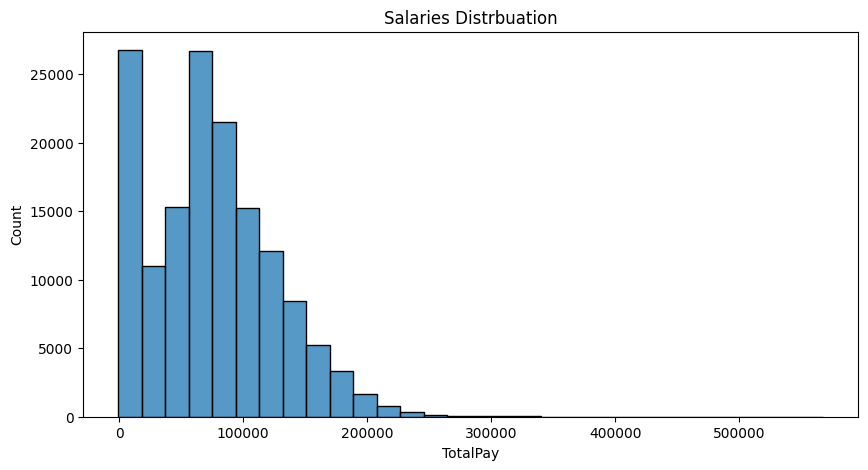

In [15]:
# the distribution of salaries with histogram
plt.figure(figsize=(10,5))
plt.title('Salaries Distrbuation')
sns.histplot(data=df,x='TotalPay',bins=30)

- Because we have a lot of jop titles and this will make the figure is not good so we Get the top and buttom N job titles based on the number of employees

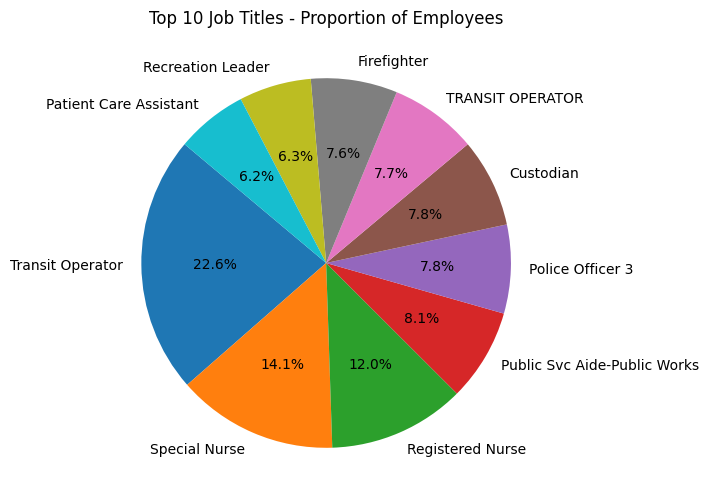

In [16]:
## TOP
department_counts = df['JobTitle'].value_counts()
# Get the top N job titles based on the number of employees
top_n = 10  
top_job_titles = df['JobTitle'].value_counts().nlargest(top_n)

# Plotting it
plt.figure(figsize=(10, 6))
plt.pie(top_job_titles, labels=top_job_titles.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Job Titles - Proportion of Employees')
plt.show()

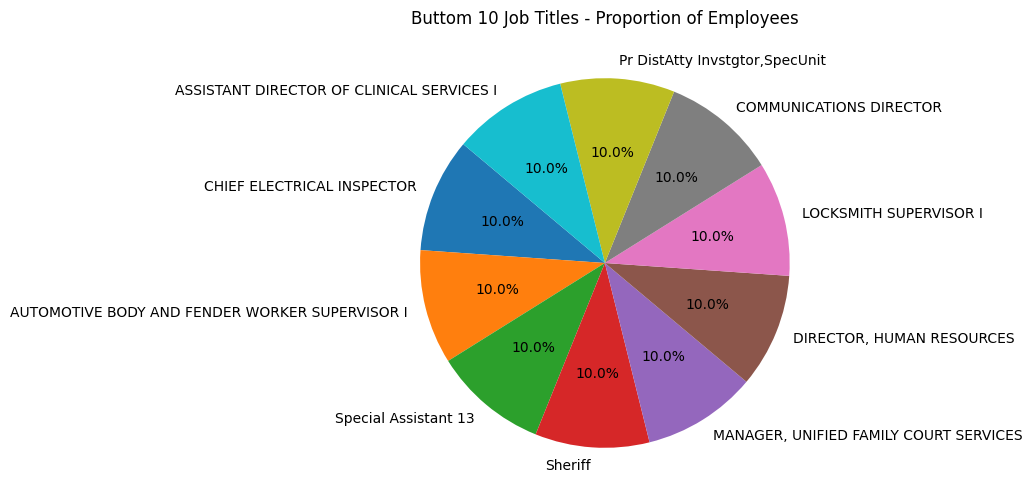

In [30]:
## BUTTOM
department_counts = df['JobTitle'].value_counts()
# Get the top N job titles based on the number of employees
buttom_n = 10  
buttom_job_titles = df['JobTitle'].value_counts().nsmallest(top_n)

# Plotting it
plt.figure(figsize=(10, 6))
plt.pie(buttom_job_titles, labels=buttom_job_titles.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Buttom {buttom_n} Job Titles - Proportion of Employees')
plt.show()

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [27]:
# we will group data by  JopTitle and compare every group with another one by the avg salary(TotalPay)
# Top 10
df.groupby([ 'JobTitle'])['TotalPay'].mean().reset_index().sort_values(by='TotalPay',ascending=False).head(10)

,JobTitle,TotalPay
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
466,Chief Investment Officer,339653.700000
474,Chief of Police,329183.646667
475,"Chief, Fire Department",325971.683333
586,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
324,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
838,"Gen Mgr, Public Trnsp Dept",297769.413333
206,Asst Chf of Dept (Fire Dept),281763.483889
576,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
621,"Dep Dir for Investments, Ret",278592.545000


In [29]:
# we will group data by  JopTitle and compare every group with another one by the avg salary(TotalPay)
# Buttom 10
df.groupby([ 'JobTitle'])['TotalPay'].mean().reset_index().sort_values(by='TotalPay',ascending=False).tail(10)

,JobTitle,TotalPay
271,"BdComm Mbr, Grp3,M=$50/Mtg",706.698276
1729,SPECIAL ASSISTANT XIV,673.800000
253,"BOARD/COMMISSION MEMBER, GROUP III",638.787879
252,"BOARD/COMMISSION MEMBER, GROUP II",296.511628
270,"BdComm Mbr, Grp2,M=$25/Mtg",263.766129
1415,PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,149.510000
499,"Commissioner 16.700c, No Pay",25.760000
661,Drug Court Coordinator,0.000000
975,IS Technician Assistant,0.000000
1537,Public Safety Comm Tech,0.000000


6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [19]:
# get the correlation between salary and benfits with corr function
df[['TotalPay', 'Benefits']].corr()

,TotalPay,Benefits
TotalPay,1.00000,0.78271
Benefits,0.78271,1.00000


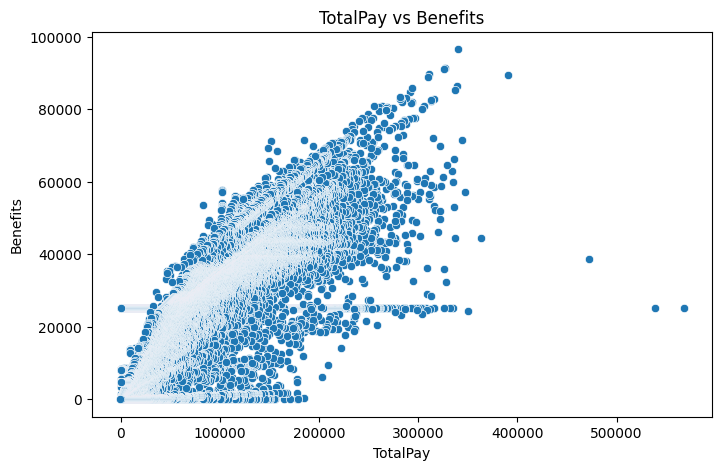

In [20]:
# plot a scatter plot to visualize the relationship.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='TotalPay', y='Benefits')
plt.title('TotalPay vs Benefits')
plt.xlabel('TotalPay')
plt.ylabel('Benefits')
plt.show()

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

#### Conclusion

Analysis Insights
* The biggest range for salaries from 80K to 130K mainly.
* If we increase benfits or basebay ,ofcourse this will increase the total salary so we have postive co-relation in this case between variables.
* I got that *GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY* are the most postion get salary then *Chief Investment Officer* then *Cheif of Police*.
* [Drug Court Coordinator] ,  [	IS  Technician Assistan] and [Public Safety Comm Tech ] are the least postions get salary.
* I found in the Top 10 Job Titles VS Proportion of Employees That first one is *Transit Opreator* then [Special Nurse]

# Good Luck!